In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns
pd.set_option('display.max_columns', None)

In [2]:
anime_df = pd.read_csv('data/anime.csv')
rating_df = pd.read_csv('data/rating.csv')
anime_meta = pd.read_csv('data/AnimeList_meta.csv')
users_meta = pd.read_csv('data/UserList_Meta.csv')

In [3]:
anime_df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [4]:
anime_df.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [5]:
print(anime_df.nunique())
anime_df.info()

anime_id    12294
name        12292
genre        3264
type            6
episodes      187
rating        598
members      6706
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [6]:
anime_meta['anime_id'].nunique()

14478

In [7]:
anime_meta.isnull().sum()

anime_id              0
title                 0
title_english      8754
title_japanese       35
title_synonyms     5541
image_url            96
type                  0
source                0
episodes              0
status                0
airing                0
aired_string          0
aired                 0
duration              0
rating                0
score                 0
scored_by             0
rank               1574
popularity            0
members               0
favorites             0
background        13421
premiered         10382
broadcast         10207
related               0
producer           6190
licensor          11105
studio             5934
genre                64
opening_theme         0
ending_theme          0
dtype: int64

In [8]:
anime_meta[anime_meta['type']=='Movie']['duration']

55              Unknown
77        1 hr. 36 min.
78              25 min.
81              49 min.
86               8 min.
              ...      
14440      1 hr. 5 min.
14443    4 min. per ep.
14446           19 min.
14465           20 min.
14475           Unknown
Name: duration, Length: 2624, dtype: object

In [9]:
rating_df['user_id'].nunique()

73515

In [10]:
rating_df

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1
...,...,...,...
7813732,73515,16512,7
7813733,73515,17187,9
7813734,73515,22145,10
7813735,73516,790,9


In [11]:
users_meta['user_id'].nunique()

302673

In [12]:
rating_df['anime_id'].nunique()

11200

In [13]:
rating_df.isnull().sum()

user_id     0
anime_id    0
rating      0
dtype: int64

In [14]:
users_meta.isnull().sum()

username                         1
user_id                          0
user_watching                    0
user_completed                   0
user_onhold                      0
user_dropped                     0
user_plantowatch                 0
user_days_spent_watching         0
gender                       84875
location                    145901
birth_date                  133926
access_rank                 302675
join_date                      129
last_online                    129
stats_mean_score               129
stats_rewatched                129
stats_episodes                 129
dtype: int64

## Merge the dataframes into one dataframe

In [15]:
rating_df = rating_df[rating_df['rating']!=-1]
#remove the -1's, which are no values for the ratings

count_ratings = rating_df.groupby('anime_id').count().rename(columns={'rating': 'num_ratings'})['num_ratings']
count_ratings

anime_id
1        13449
5         5790
6         9385
7         2169
8          308
         ...  
34324       11
34325       15
34349        3
34367        4
34475        3
Name: num_ratings, Length: 9927, dtype: int64

In [16]:
anime_full = anime_df.merge(right=anime_meta, how='left', on='anime_id')
anime_full = anime_full.merge(right=count_ratings, how='left', on='anime_id')
anime_full

,anime_id,name,genre_x,type_x,episodes_x,rating_x,members_x,title,title_english,title_japanese,title_synonyms,image_url,type_y,source,episodes_y,status,airing,aired_string,aired,duration,rating_y,score,scored_by,rank,popularity,members_y,favorites,background,premiered,broadcast,related,producer,licensor,studio,genre_y,opening_theme,ending_theme,num_ratings
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,Kimi no Na wa.,Your Name.,君の名は。,NaN,https://myanimelist.cdn-dena.com/images/anime/...,Movie,Original,1.0,Finished Airing,False,"Aug 26, 2016","{'from': '2016-08-26', 'to': '2016-08-26'}",1 hr. 46 min.,PG-13 - Teens 13 or older,9.19,471398.0,2.0,33.0,730076.0,34912.0,NaN,NaN,NaN,"{'Adaptation': [{'mal_id': 99314, 'type': 'man...","Kadokawa Shoten, Toho, Sound Team Don Juan, La...","Funimation, NYAV Post",CoMix Wave Films,"Supernatural, Drama, Romance, School","['""Yume Tourou (夢灯籠)"" by RADWIMPS']","['""Nandemonaiya (なんでもないや)"" by RADWIMPS']",1961.0
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,Fullmetal Alchemist: Brotherhood,Fullmetal Alchemist: Brotherhood,鋼の錬金術師 FULLMETAL ALCHEMIST,"Hagane no Renkinjutsushi: Fullmetal Alchemist,...",https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,64.0,Finished Airing,False,"Apr 5, 2009 to Jul 4, 2010","{'from': '2009-04-05', 'to': '2010-07-04'}",24 min. per ep.,R - 17+ (violence & profanity),9.25,733592.0,1.0,4.0,1199091.0,106895.0,Fullmetal Alchemist: Brotherhood is an alterna...,Spring 2009,Sundays at 17:00 (JST),"{'Adaptation': [{'mal_id': 25, 'type': 'manga'...","Aniplex, Square Enix, Mainichi Broadcasting Sy...","Funimation, Aniplex of America",Bones,"Action, Military, Adventure, Comedy, Drama, Ma...","['#1: ""again"" by YUI (eps 1-14)', '#2: ""Hologr...","['#1: ""Uso (嘘)"" by SID (eps 1-14)', '#2: ""LET ...",21494.0
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,Gintama°,Gintama Season 4,銀魂°,Gintama&#039; (2015),https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,51.0,Finished Airing,False,"Apr 8, 2015 to Mar 30, 2016","{'from': '2015-04-08', 'to': '2016-03-30'}",24 min. per ep.,R - 17+ (violence & profanity),9.15,71751.0,3.0,383.0,198744.0,5668.0,This is a fourth season of Gintama. In the ep...,Spring 2015,Wednesdays at 18:00 (JST),"{'Adaptation': [{'mal_id': 44, 'type': 'manga'...","TV Tokyo, Aniplex, Dentsu","Funimation, Crunchyroll",Bandai Namco Pictures,"Action, Comedy, Historical, Parody, Samurai, S...","['#1: ""DAY×DAY"" by BLUE ENCOUNT (eps 1-12)', '...","['#1: ""DESTINY"" by Negoto (eps 1-12)', '#2: ""S...",1188.0
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,Steins;Gate,Steins;Gate,STEINS;GATE,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Visual novel,24.0,Finished Airing,False,"Apr 6, 2011 to Sep 14, 2011","{'from': '2011-04-06', 'to': '2011-09-14'}",24 min. per ep.,PG-13 - Teens 13 or older,9.14,563857.0,5.0,8.0,1010330.0,92423.0,Steins;Gate is based on 5pb. and Nitroplus&#03...,Spring 2011,Wednesdays at 02:05 (JST),"{'Adaptation': [{'mal_id': 17517, 'type': 'man...","Frontier Works, Media Factory, Movic, AT-X, Ka...",Funimation,White Fox,"Thriller, Sci-Fi","['""Hacking to the Gate"" by Kanako Itou']","['#1: ""Toki Tsukasadoru Juuni no Meiyaku (刻司ル十...",17151.0
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,Gintama&#039;,Gintama Season 2,銀魂&#039;,Gintama (2011),https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,51.0,Finished Airing,False,"Apr 4, 2011 to Mar 26, 2012","{'from': '2011-04-04', 'to': '2012-03-26'}",24 min. per ep.,PG-13 - Teens 13 or older,9.11,92025.0,7.0,342.0,215527.0,4549.0,This is the second season of Gintama. In the e...,Spring 2011,Mondays at 18:00 (JST),"{'Adaptation': [{'mal_id': 44, 'type': 'manga'...","TV Tokyo, Aniplex, Dentsu, Trinity Sound, Mira...",NaN,Sunrise,"Action, Sci-Fi, Comedy, Historical, Parody, Sa...","['#1: ""T

In [17]:
anime_full['type_x'].unique()
#only care about Movie & TV, what is OVA & ONA?

array(['Movie', 'TV', 'OVA', 'Special', 'Music', 'ONA', nan], dtype=object)

In [18]:
anime_full['rating_y'].unique()

array(['PG-13 - Teens 13 or older', 'R - 17+ (violence & profanity)',
       'PG - Children', 'G - All Ages', 'R+ - Mild Nudity', 'None', nan,
       'Rx - Hentai'], dtype=object)

In [19]:
producers = anime_full['producer'].nunique()
licensers = anime_full['licensor'].nunique()
studio = anime_full['studio'].nunique()
print(f'Producers: {producers}, Licensors: {licensers}, studio: {studio}')

Producers: 3004, Licensors: 190, studio: 694


In [20]:
anime_full['licensor'].unique()[0]
#Licensors are lists of multiple licensors, may be worth while to blow up

'Funimation, NYAV Post'

In [21]:
anime_full['producer'].unique()[0]
#Same for producers, may need to blow up

'Kadokawa Shoten, Toho, Sound Team Don Juan, Lawson HMV Entertainment, Amuse, East Japan Marketing &amp; Communications'

In [22]:
anime_full['studio'].unique()[0]
#Only one studio per anime, can visualize ratings per studio

'CoMix Wave Films'

In [23]:
anime_full['background']
#Most background cells are empty. Bummer. Cannot use NLP to analyze.

0                                                      NaN
1        Fullmetal Alchemist: Brotherhood is an alterna...
2         This is a fourth season of Gintama. In the ep...
3        Steins;Gate is based on 5pb. and Nitroplus&#03...
4        This is the second season of Gintama. In the e...
                               ...                        
12289                                                  NaN
12290                                                  NaN
12291                                                  NaN
12292                                                  NaN
12293                                                  NaN
Name: background, Length: 12294, dtype: object

In [24]:
anime_full['image_url'][0]

'https://myanimelist.cdn-dena.com/images/anime/5/87048.jpg'

In [25]:
anime_full[['name','title','title_japanese','title_english','title_synonyms']].isnull().sum()
#drop the unneccessary additional titles

name                 0
title               17
title_japanese      40
title_english     7217
title_synonyms    4537
dtype: int64

In [26]:
(anime_full.isnull().sum()/len(anime_full)).sort_values(ascending=False)

background        0.924597
licensor          0.736213
premiered         0.698878
broadcast         0.691069
title_english     0.587034
producer          0.390678
studio            0.375874
title_synonyms    0.369042
num_ratings       0.192614
rank              0.099723
rating_x          0.018708
image_url         0.007077
genre_x           0.005043
genre_y           0.004799
title_japanese    0.003254
type_x            0.002034
status            0.001383
title             0.001383
type_y            0.001383
source            0.001383
episodes_y        0.001383
aired             0.001383
airing            0.001383
aired_string      0.001383
ending_theme      0.001383
duration          0.001383
rating_y          0.001383
score             0.001383
scored_by         0.001383
popularity        0.001383
members_y         0.001383
favorites         0.001383
related           0.001383
opening_theme     0.001383
members_x         0.000000
episodes_x        0.000000
name              0.000000
a

In [27]:
anime_full[['type_x','type_y']].isnull().sum() #keep y
anime_full[['episodes_x','episodes_y']].isnull().sum() #keep x
anime_full[['status','airing']].isnull().sum() #Drop airing, contains redundant info
anime_full[['rating_x', 'members_x','score','scored_by', 'members_y']] #drop all score columns from meta_df
anime_full[['genre_x','genre_y']].isnull().sum() #drop genre_x
anime_full[['opening_theme','ending_theme']].iloc[1,:] # could we do some sort of NLP on the opening/ending themes?

opening_theme    ['#1: "again" by YUI (eps 1-14)', '#2: "Hologr...
ending_theme     ['#1: "Uso (嘘)" by SID (eps 1-14)', '#2: "LET ...
Name: 1, dtype: object

In [28]:
anime_full['related'][0]
#not sure what this is, delete.

"{'Adaptation': [{'mal_id': 99314, 'type': 'manga', 'url': 'https://myanimelist.net/manga/99314/Kimi_no_Na_wa', 'title': 'Kimi no Na wa.'}, {'mal_id': 111747, 'type': 'manga', 'url': 'https://myanimelist.net/manga/111747/Kimi_no_Na_wa', 'title': 'Kimi no Na wa.'}], 'Other': [{'mal_id': 33902, 'type': 'anime', 'url': 'https://myanimelist.net/anime/33902/Suntory_Minami_Alps_no_Tennen_Mizu', 'title': 'Suntory Minami Alps no Tennen Mizu'}]}"

In [29]:
anime_full[['aired_string','aired']]

,aired_string,aired
0,"Aug 26, 2016","{'from': '2016-08-26', 'to': '2016-08-26'}"
1,"Apr 5, 2009 to Jul 4, 2010","{'from': '2009-04-05', 'to': '2010-07-04'}"
2,"Apr 8, 2015 to Mar 30, 2016","{'from': '2015-04-08', 'to': '2016-03-30'}"
3,"Apr 6, 2011 to Sep 14, 2011","{'from': '2011-04-06', 'to': '2011-09-14'}"
4,"Apr 4, 2011 to Mar 26, 2012","{'from': '2011-04-04', 'to': '2012-03-26'}"
...,...,...
12289,"Oct 26, 2001","{'from': '2001-10-26', 'to': '2001-10-26'}"
12290,"Nov 18, 2000","{'from': '2000-11-18', 'to': '2000-11-18'}"
12291,"Dec 5, 1989 to Jun 5, 1990","{'from': '1989-12-05', 'to': '1990-06-05'}"
12292,"Mar 8, 1991","{'from': '1991-03-08', 'to': '1991-03-08'}"


## Final Cleaning of anime_df

In [30]:
anime_full = anime_full.drop(columns=['title','title_japanese','title_english','title_synonyms', 'type_x',
                                      'episodes_y', 'airing', 'score','scored_by', 'members_y', 'background',
                                     'licensor', 'premiered', 'broadcast', 'related', 'genre_x', 'aired_string'])
anime_full

,anime_id,name,episodes_x,rating_x,members_x,image_url,type_y,source,status,aired,duration,rating_y,rank,popularity,favorites,producer,studio,genre_y,opening_theme,ending_theme,num_ratings
0,32281,Kimi no Na wa.,1,9.37,200630,https://myanimelist.cdn-dena.com/images/anime/...,Movie,Original,Finished Airing,"{'from': '2016-08-26', 'to': '2016-08-26'}",1 hr. 46 min.,PG-13 - Teens 13 or older,2.0,33.0,34912.0,"Kadokawa Shoten, Toho, Sound Team Don Juan, La...",CoMix Wave Films,"Supernatural, Drama, Romance, School","['""Yume Tourou (夢灯籠)"" by RADWIMPS']","['""Nandemonaiya (なんでもないや)"" by RADWIMPS']",1961.0
1,5114,Fullmetal Alchemist: Brotherhood,64,9.26,793665,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,Finished Airing,"{'from': '2009-04-05', 'to': '2010-07-04'}",24 min. per ep.,R - 17+ (violence & profanity),1.0,4.0,106895.0,"Aniplex, Square Enix, Mainichi Broadcasting Sy...",Bones,"Action, Military, Adventure, Comedy, Drama, Ma...","['#1: ""again"" by YUI (eps 1-14)', '#2: ""Hologr...","['#1: ""Uso (嘘)"" by SID (eps 1-14)', '#2: ""LET ...",21494.0
2,28977,Gintama°,51,9.25,114262,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,Finished Airing,"{'from': '2015-04-08', 'to': '2016-03-30'}",24 min. per ep.,R - 17+ (violence & profanity),3.0,383.0,5668.0,"TV Tokyo, Aniplex, Dentsu",Bandai Namco Pictures,"Action, Comedy, Historical, Parody, Samurai, S...","['#1: ""DAY×DAY"" by BLUE ENCOUNT (eps 1-12)', '...","['#1: ""DESTINY"" by Negoto (eps 1-12)', '#2: ""S...",1188.0
3,9253,Steins;Gate,24,9.17,673572,https://myanimelist.cdn-dena.com/images/anime/...,TV,Visual novel,Finished Airing,"{'from': '2011-04-06', 'to': '2011-09-14'}",24 min. per ep.,PG-13 - Teens 13 or older,5.0,8.0,92423.0,"Frontier Works, Media Factory, Movic, AT-X, Ka...",White Fox,"Thriller, Sci-Fi","['""Hacking to the Gate"" by Kanako Itou']","['#1: ""Toki Tsukasadoru Juuni no Meiyaku (刻司ル十...",17151.0
4,9969,Gintama&#039;,51,9.16,151266,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,Finished Airing,"{'from': '2011-04-04', 'to': '2012-03-26'}",24 min. per ep.,PG-13 - Teens 13 or older,7.0,342.0,4549.0,"TV Tokyo, Aniplex, Dentsu, Trinity Sound, Mira...",Sunrise,"Action, Sci-Fi, Comedy, Historical, Parody, Sa...","['#1: ""Tougenkyou Alien (桃源郷エイリアン)"" by serial ...","['#1: ""Samurai Heart (Some Like It Hot!!)"" by ...",3115.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,1,4.15,211,https://myanimelist.cdn-dena.com/images/anime/...,OVA,Unknown,Finished Airing,"{'from': '2001-10-26', 'to': '2001-10-26'}",30 min.,Rx - Hentai,NaN,10297.0,0.0,NaN,NaN,Hentai,[],[],2.0
12290,5543,Under World,1,4.28,183,https://myanimelist.cdn-dena.com/images/anime/...,OVA,Unknown,Finished Airing,"{'from': '2000-11-18', 'to': '2000-11-18'}",1 hr. 4 min.,Rx - Hentai,NaN,10456.0,0.0,NaN,NaN,Hentai,[],[],2.0
12291,5621,Violence Gekiga David no Hoshi,4,4.88,219,https://myanimelist.cdn-dena.com/images/anime/...,OVA,Unknown,Finished Airing,"{'from': '1989-12-05', 'to': '1990-06-05'}",45 min. per ep.,Rx - Hentai,NaN,10164.0,2.0,NaN,NaN,Hentai,[],[],1.0
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,1,4.98,175,https://myanimelist.cdn-dena.com/images/anime/...,OVA,Unknown,Finished Airing,"{'from': '1991-03-08', 'to': '1991-03-08'}",45 min.,Rx - Hentai,NaN,10510.0,0.0,NaN,NaN,Hentai,[],[],1.0


In [31]:
anime_full = anime_full.rename(columns={'rating_x': 'avg_rating','rating_y': 'rating_type', 'genre_y':'genre', 
                                        'members_x': 'members', 'episodes_x':'episodes', 'type_y':'type'})
anime_full

,anime_id,name,episodes,avg_rating,members,image_url,type,source,status,aired,duration,rating_type,rank,popularity,favorites,producer,studio,genre,opening_theme,ending_theme,num_ratings
0,32281,Kimi no Na wa.,1,9.37,200630,https://myanimelist.cdn-dena.com/images/anime/...,Movie,Original,Finished Airing,"{'from': '2016-08-26', 'to': '2016-08-26'}",1 hr. 46 min.,PG-13 - Teens 13 or older,2.0,33.0,34912.0,"Kadokawa Shoten, Toho, Sound Team Don Juan, La...",CoMix Wave Films,"Supernatural, Drama, Romance, School","['""Yume Tourou (夢灯籠)"" by RADWIMPS']","['""Nandemonaiya (なんでもないや)"" by RADWIMPS']",1961.0
1,5114,Fullmetal Alchemist: Brotherhood,64,9.26,793665,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,Finished Airing,"{'from': '2009-04-05', 'to': '2010-07-04'}",24 min. per ep.,R - 17+ (violence & profanity),1.0,4.0,106895.0,"Aniplex, Square Enix, Mainichi Broadcasting Sy...",Bones,"Action, Military, Adventure, Comedy, Drama, Ma...","['#1: ""again"" by YUI (eps 1-14)', '#2: ""Hologr...","['#1: ""Uso (嘘)"" by SID (eps 1-14)', '#2: ""LET ...",21494.0
2,28977,Gintama°,51,9.25,114262,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,Finished Airing,"{'from': '2015-04-08', 'to': '2016-03-30'}",24 min. per ep.,R - 17+ (violence & profanity),3.0,383.0,5668.0,"TV Tokyo, Aniplex, Dentsu",Bandai Namco Pictures,"Action, Comedy, Historical, Parody, Samurai, S...","['#1: ""DAY×DAY"" by BLUE ENCOUNT (eps 1-12)', '...","['#1: ""DESTINY"" by Negoto (eps 1-12)', '#2: ""S...",1188.0
3,9253,Steins;Gate,24,9.17,673572,https://myanimelist.cdn-dena.com/images/anime/...,TV,Visual novel,Finished Airing,"{'from': '2011-04-06', 'to': '2011-09-14'}",24 min. per ep.,PG-13 - Teens 13 or older,5.0,8.0,92423.0,"Frontier Works, Media Factory, Movic, AT-X, Ka...",White Fox,"Thriller, Sci-Fi","['""Hacking to the Gate"" by Kanako Itou']","['#1: ""Toki Tsukasadoru Juuni no Meiyaku (刻司ル十...",17151.0
4,9969,Gintama&#039;,51,9.16,151266,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,Finished Airing,"{'from': '2011-04-04', 'to': '2012-03-26'}",24 min. per ep.,PG-13 - Teens 13 or older,7.0,342.0,4549.0,"TV Tokyo, Aniplex, Dentsu, Trinity Sound, Mira...",Sunrise,"Action, Sci-Fi, Comedy, Historical, Parody, Sa...","['#1: ""Tougenkyou Alien (桃源郷エイリアン)"" by serial ...","['#1: ""Samurai Heart (Some Like It Hot!!)"" by ...",3115.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,1,4.15,211,https://myanimelist.cdn-dena.com/images/anime/...,OVA,Unknown,Finished Airing,"{'from': '2001-10-26', 'to': '2001-10-26'}",30 min.,Rx - Hentai,NaN,10297.0,0.0,NaN,NaN,Hentai,[],[],2.0
12290,5543,Under World,1,4.28,183,https://myanimelist.cdn-dena.com/images/anime/...,OVA,Unknown,Finished Airing,"{'from': '2000-11-18', 'to': '2000-11-18'}",1 hr. 4 min.,Rx - Hentai,NaN,10456.0,0.0,NaN,NaN,Hentai,[],[],2.0
12291,5621,Violence Gekiga David no Hoshi,4,4.88,219,https://myanimelist.cdn-dena.com/images/anime/...,OVA,Unknown,Finished Airing,"{'from': '1989-12-05', 'to': '1990-06-05'}",45 min. per ep.,Rx - Hentai,NaN,10164.0,2.0,NaN,NaN,Hentai,[],[],1.0
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,1,4.98,175,https://myanimelist.cdn-dena.com/images/anime/...,OVA,Unknown,Finished Airing,"{'from': '1991-03-08', 'to': '1991-03-08'}",45 min.,Rx - Hentai,NaN,10510.0,0.0,NaN,NaN,Hentai,[],[],1.0


In [32]:
anime_full[anime_full['num_ratings'].isnull()]

,anime_id,name,episodes,avg_rating,members,image_url,type,source,status,aired,duration,rating_type,rank,popularity,favorites,producer,studio,genre,opening_theme,ending_theme,num_ratings
31,32983,Natsume Yuujinchou Go,13,8.76,38865,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,Finished Airing,"{'from': '2016-10-05', 'to': '2016-12-21'}",23 min. per ep.,PG-13 - Teens 13 or older,63.0,1038.0,459.0,"TV Tokyo, Aniplex, Nihon Ad Systems, Hakusensha",Shuka,"Slice of Life, Supernatural, Drama, Fantasy, S...","['""Takarabako (タカラバコ)"" by Sasanomaly (ササノマリイ)']","['""Akane Sasu (茜さす)"" by Aimer']",NaN
62,32995,Yuri!!! on Ice,12,8.61,103178,https://myanimelist.cdn-dena.com/images/anime/...,TV,Original,Finished Airing,"{'from': '2016-10-06', 'to': '2016-12-22'}",23 min. per ep.,PG-13 - Teens 13 or older,339.0,238.0,11140.0,"Dentsu, TV Asahi, Movic, Avex Pictures, CIC, C...",MAPPA,"Comedy, Sports","['""History Maker"" by Dean Fujioka']","['""You Only Live Once"" by YURI!!! on ICE feat....",NaN
74,21,One Piece,Unknown,8.58,504862,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,Currently Airing,"{'from': '1999-10-20', 'to': None}",24 min.,PG-13 - Teens 13 or older,91.0,35.0,69760.0,"Fuji TV, TAP, Shueisha",Toei Animation,"Action, Adventure, Comedy, Super Power, Drama,...","['#01: ""We Are! (ウィーアー!)"" by Hiroshi Kitadani ...","['#01: ""memories"" by Maki Otsuki (eps 1-30)', ...",NaN
76,31933,JoJo no Kimyou na Bouken: Diamond wa Kudakenai,39,8.57,74074,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,Finished Airing,"{'from': '2016-04-02', 'to': '2016-12-24'}",23 min. per ep.,R - 17+ (violence & profanity),64.0,432.0,7188.0,"Warner Bros., KlockWorx, Medicos Entertainment...",David Production,"Action, Adventure, Comedy, Supernatural, Drama...","['#1: ""Crazy Noisy Bizarre Town"" by THE DU (ep...","['#1: ""I WANT YOU"" by Savage Garden (eps 2-7, ...",NaN
140,10937,Mobile Suit Gundam: The Origin,6,8.42,15420,https://myanimelist.cdn-dena.com/images/anime/...,OVA,Manga,Finished Airing,"{'from': '2015-04-24', 'to': '2018-05-05'}",1 hr. 3 min. per ep.,R+ - Mild Nudity,128.0,2189.0,240.0,NaN,Sunrise,"Action, Military, Sci-Fi, Space, Mecha, Shounen",[],"['#1: ""Hoshikuzu no Sunadokei (星屑の砂時計)"" by Tak...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12282,34388,Shikkoku no Shaga The Animation,Unknown,NaN,195,https://myanimelist.cdn-dena.com/images/anime/...,OVA,Original,Currently Airing,"{'from': '2017-02-24', 'to': None}",30 min.,Rx - Hentai,NaN,5491.0,37.0,Pink Pineapple,Seven,Hentai,[],"['""Treasures"" by Naoka Wada']",NaN
12283,29992,Silent Chaser Kagami,1,4.95,112,https://myanimelist.cdn-dena.com/images/anime/...,OVA,Unknown,Finished Airing,"{'from': '2000-08-21', 'to': '2000-08-21'}",30 min.,Rx - Hentai,NaN,10978.0,0.0,NaN,NaN,Hentai,[],[],NaN
12284,26031,Super Erotic Anime,2,4.45,118,https://myanimelist.cdn-dena.com/images/anime/...,OVA,Unknown,Finished Airing,"{'from': '1985-10-09', 'to': '1985-10-17'}",27 min. per ep.,Rx - Hentai,NaN,11020.0,1.0,NaN,NaN,Hentai,[],[],NaN
12285,34399,Taimanin Asagi 3,Unknown,NaN,485,https://myanimelist.cdn-dena.com/images/anime/...,OVA,Visual novel,Currently Airing,"{'from': '2016-12-23', 'to': None}",30 min.,Rx - Hentai,NaN,6438.0,15.0,ZIZ Entertainment (ZIZ),Studio Eromatick,"Demons, Hentai, Supernatural",[],"['""Catharsis no Yume (カタルシスの夢)"" by Maiko']",NaN


In [33]:
def weighted_rating(x):
    m = x['members'].quantile(0.80)
    C = x['avg_rating'].mean()
    v = x['members']
    R = x['avg_rating']
    # Compute the weighted score
    return (v/(v+m) * R) + (m/(m+v) * C)

In [34]:
anime_full = pd.concat([anime_full, weighted_rating(anime_full)], axis=1)
anime_full = anime_full.rename(columns={0: 'weighted_rating'})
anime_full

,anime_id,name,episodes,avg_rating,members,image_url,type,source,status,aired,duration,rating_type,rank,popularity,favorites,producer,studio,genre,opening_theme,ending_theme,num_ratings,weighted_rating
0,32281,Kimi no Na wa.,1,9.37,200630,https://myanimelist.cdn-dena.com/images/anime/...,Movie,Original,Finished Airing,"{'from': '2016-08-26', 'to': '2016-08-26'}",1 hr. 46 min.,PG-13 - Teens 13 or older,2.0,33.0,34912.0,"Kadokawa Shoten, Toho, Sound Team Don Juan, La...",CoMix Wave Films,"Supernatural, Drama, Romance, School","['""Yume Tourou (夢灯籠)"" by RADWIMPS']","['""Nandemonaiya (なんでもないや)"" by RADWIMPS']",1961.0,9.169377
1,5114,Fullmetal Alchemist: Brotherhood,64,9.26,793665,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,Finished Airing,"{'from': '2009-04-05', 'to': '2010-07-04'}",24 min. per ep.,R - 17+ (violence & profanity),1.0,4.0,106895.0,"Aniplex, Square Enix, Mainichi Broadcasting Sy...",Bones,"Action, Military, Adventure, Comedy, Drama, Ma...","['#1: ""again"" by YUI (eps 1-14)', '#2: ""Hologr...","['#1: ""Uso (嘘)"" by SID (eps 1-14)', '#2: ""LET ...",21494.0,9.208548
2,28977,Gintama°,51,9.25,114262,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,Finished Airing,"{'from': '2015-04-08', 'to': '2016-03-30'}",24 min. per ep.,R - 17+ (violence & profanity),3.0,383.0,5668.0,"TV Tokyo, Aniplex, Dentsu",Bandai Namco Pictures,"Action, Comedy, Historical, Parody, Samurai, S...","['#1: ""DAY×DAY"" by BLUE ENCOUNT (eps 1-12)', '...","['#1: ""DESTINY"" by Negoto (eps 1-12)', '#2: ""S...",1188.0,8.929129
3,9253,Steins;Gate,24,9.17,673572,https://myanimelist.cdn-dena.com/images/anime/...,TV,Visual novel,Finished Airing,"{'from': '2011-04-06', 'to': '2011-09-14'}",24 min. per ep.,PG-13 - Teens 13 or older,5.0,8.0,92423.0,"Frontier Works, Media Factory, Movic, AT-X, Ka...",White Fox,"Thriller, Sci-Fi","['""Hacking to the Gate"" by Kanako Itou']","['#1: ""Toki Tsukasadoru Juuni no Meiyaku (刻司ル十...",17151.0,9.111525
4,9969,Gintama&#039;,51,9.16,151266,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,Finished Airing,"{'from': '2011-04-04', 'to': '2012-03-26'}",24 min. per ep.,PG-13 - Teens 13 or older,7.0,342.0,4549.0,"TV Tokyo, Aniplex, Dentsu, Trinity Sound, Mira...",Sunrise,"Action, Sci-Fi, Comedy, Historical, Parody, Sa...","['#1: ""Tougenkyou Alien (桃源郷エイリアン)"" by serial ...","['#1: ""Samurai Heart (Some Like It Hot!!)"" by ...",3115.0,8.918657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,1,4.15,211,https://myanimelist.cdn-dena.com/images/anime/...,OVA,Unknown,Finished Airing,"{'from': '2001-10-26', 'to': '2001-10-26'}",30 min.,Rx - Hentai,NaN,10297.0,0.0,NaN,NaN,Hentai,[],[],2.0,6.441523
12290,5543,Under World,1,4.28,183,https://myanimelist.cdn-dena.com/images/anime/...,OVA,Unknown,Finished Airing,"{'from': '2000-11-18', 'to': '2000-11-18'}",1 hr. 4 min.,Rx - Hentai,NaN,10456.0,0.0,NaN,NaN,Hentai,[],[],2.0,6.447341
12291,5621,Violence Gekiga David no Hoshi,4,4.88,219,https://myanimelist.cdn-dena.com/images/anime/...,OVA,Unknown,Finished Airing,"{'from': '1989-12-05', 'to': '1990-06-05'}",45 min. per ep.,Rx - Hentai,NaN,10164.0,2.0,NaN,NaN,Hentai,[],[],1.0,6.450864
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,1,4.98,175,https://myanimelist.cdn-dena.com/images/anime/...,OVA,Unknown,Finished Airing,"{'from': '1991-03-08', 'to': '1991-03-08'}",45 min.,Rx - Hentai,NaN,10510.0,0.0,NaN,NaN,Hentai,[],[],1.0,6.456597


Text(0.5, 0, 'Ratings from 1-10')

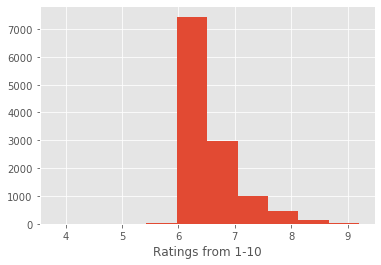

In [35]:
anime_full['weighted_rating'].hist()
plt.xlabel('Ratings from 1-10')

<BarContainer object of 7 artists>

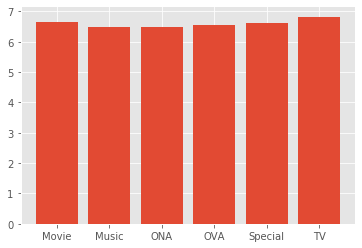

In [36]:
grouped = anime_full.groupby('type').mean()['weighted_rating']
plt.bar(grouped.index, height=grouped.values)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 <a list of 16 Text xticklabel objects>)

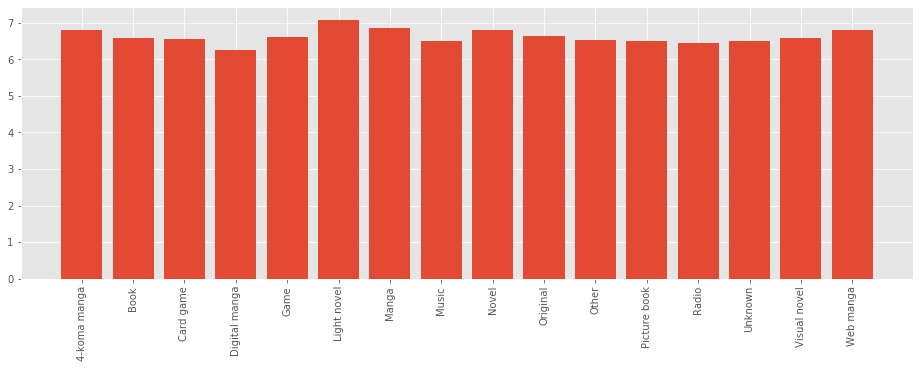

In [37]:
plt.figure(figsize=(16,5))
grouped = anime_full.groupby('source').mean()['weighted_rating']
plt.bar(grouped.index, height=grouped.values)
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6], <a list of 7 Text xticklabel objects>)

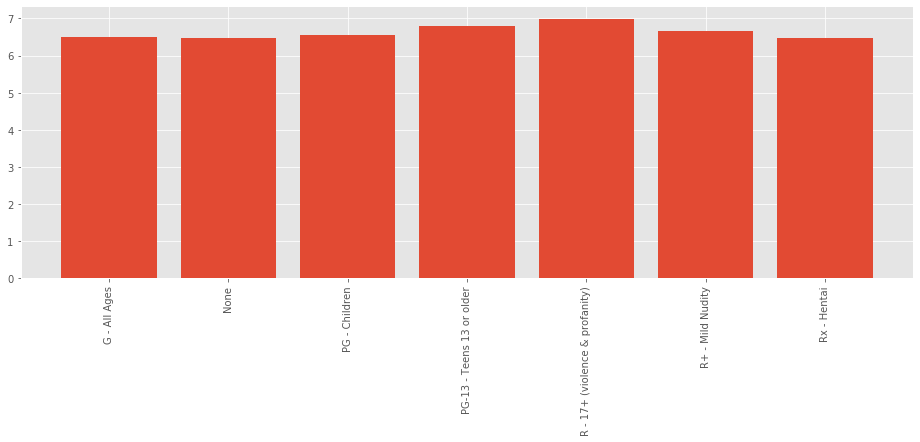

In [38]:
plt.figure(figsize=(16,5))
grouped = anime_full.groupby('rating_type').mean()['weighted_rating']
plt.bar(grouped.index, height=grouped.values)
plt.xticks(rotation=90)

In [39]:
grouped = anime_full.groupby('studio').mean()['weighted_rating']
grouped[grouped>7].sort_values(ascending=False).head(50)

studio
Artland, Magic Bus                       8.698290
Madhouse, Satelight, Graphinica          8.488846
Studio Chizu                             8.472518
Tezuka Productions, MAPPA                8.294538
Gainax, Tatsunoko Production             8.262192
Studio Ghibli, Studio Hibari             8.195621
Xebec, AIC                               8.010976
Studio Gallop, Studio Comet              7.914286
Gainax, Production I.G                   7.895271
J.C.Staff, Egg Firm                      7.852765
AIC, BeSTACK                             7.812463
Sunrise, Ascension                       7.757108
Kyoto Animation, Animation Do            7.707057
Silver Link., Nexus                      7.684214
AIC Spirits, Asread                      7.658128
Brain&#039;s Base, Marvy Jack            7.657093
Tokyo Kids, Minami Machi Bugyousho       7.610535
Studio Pierrot, Studio Hibari            7.610357
Kinema Citrus, White Fox                 7.577487
Madhouse, Studio Gokumi                  7.

In [40]:
grouped = anime_full.groupby('producer').mean()['weighted_rating']
pd.DataFrame(grouped.sort_values(ascending=False))

,weighted_rating
producer,
"Aniplex, Square Enix, Mainichi Broadcasting System, Studio Moriken",9.208548
"Kadokawa Shoten, Toho, Sound Team Don Juan, Lawson HMV Entertainment, Amuse, East Japan Marketing &amp; Communications",9.169377
"Pony Canyon, TBS, Rakuonsha, Animation Do",8.978128
"TV Tokyo, Aniplex, Dentsu, Trinity Sound, Audio Highs, Miracle Robo, Shueisha",8.930925
"TV Tokyo, Aniplex, Dentsu",8.929129
...,...
"Ultra Super Pictures, TOHO animation, Good Smile Company",NaN
"WAO World, Studio Live",NaN
"Warner Bros., Shueisha",NaN
